# 8. Подготовка данных

 Топ-250 фильмов по версии IMDb и топ-250 сериалов по версии IMDb

In [1]:
import pandas as pd

imdb_films = pd.read_csv('data/imdb.csv')
imdb_films.head(1)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"


In [2]:
# imdb_films['year'].values 

# Чистка данных

# print(imdb_films.info())
cols = ['year']
imdb_films[cols] = imdb_films[cols].abs()
imdb_films.head(1)

,rank,name,year,rating,genre,certificate,run_time,tagline,budget,box_office,casts,directors,writers
0,1,The Shawshank Redemption,1994,9.3,Drama,R,2h 22m,Fear can hold you prisoner. Hope can set you f...,25000000,28884504,"Tim Robbins,Morgan Freeman,Bob Gunton,William ...",Frank Darabont,"Stephen King,Frank Darabont"


In [3]:
imdb_series = pd.read_csv('data/imdb_series_original.csv')
imdb_series.head(1)

name_col = 'posterColumn href'
imdb_series.drop(name_col, axis='columns', inplace=True)
name_col = 'posterColumn src'
imdb_series.drop(name_col, axis='columns', inplace=True)

imdb_series.rename(columns = {'titleColumn':'Number', 
                              'titleColumn 2':'Title', 
                              'secondaryInfo':'Year', 
                              'ratingColumn':'Rating'}, inplace = True)



# imdb_series.info()
imdb_series['Year'] = imdb_series['Year'].astype('string')
imdb_series['Year'] = imdb_series['Year'].str.replace('(','')
imdb_series['Year'] = imdb_series['Year'].str.replace(')','')
imdb_series['Year'] = imdb_series['Year'].astype('int')

imdb_series.head(5)

C:\Users\anike\AppData\Local\Temp/ipykernel_10868/158430570.py:18: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_series['Year'] = imdb_series['Year'].str.replace('(','')
C:\Users\anike\AppData\Local\Temp/ipykernel_10868/158430570.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  imdb_series['Year'] = imdb_series['Year'].str.replace(')','')


,Number,Title,Year,Rating
0,1.0,Planet Earth II,2016,9.4
1,2.0,Breaking Bad,2008,9.4
2,3.0,Planet Earth,2006,9.4
3,4.0,Band of Brothers,2001,9.4
4,5.0,Chernobyl,2019,9.3


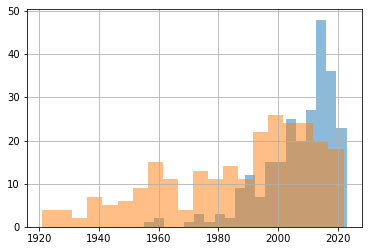

In [4]:
import matplotlib.pyplot as plt

imdb_series['Year'].hist(bins=20, alpha = 0.5)
imdb_films['year'].hist(bins=20, alpha = 0.5)
plt.show()

In [5]:
import pandas as pd

wv7 = pd.read_csv('data/WV7.csv')

# будем использовать только часть вопросов и только в отношении России

wv7_rus = wv7[wv7['B_COUNTRY'] == 643]

colums_to_subset = ['D_INTERVIEW', 'Q46', 'Q47', 'Q48', 'Q49', 'Q50', 'Q51', 
                    'Q52', 'Q53', 'Q54', 'Q55', 'Q56',  'Q260', 'Q262', 'Q275', 'Q281', 'Q288']

wv7_rusHappy = wv7_rus[colums_to_subset]

# wv7_rusHappy

C:\Users\anike\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (345,347,349,574,575,576) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
wv7_rusHappy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1810 entries, 69141 to 70950
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   D_INTERVIEW  1810 non-null   int64
 1   Q46          1810 non-null   int64
 2   Q47          1810 non-null   int64
 3   Q48          1810 non-null   int64
 4   Q49          1810 non-null   int64
 5   Q50          1810 non-null   int64
 6   Q51          1810 non-null   int64
 7   Q52          1810 non-null   int64
 8   Q53          1810 non-null   int64
 9   Q54          1810 non-null   int64
 10  Q55          1810 non-null   int64
 11  Q56          1810 non-null   int64
 12  Q260         1810 non-null   int64
 13  Q262         1810 non-null   int64
 14  Q275         1810 non-null   int64
 15  Q281         1810 non-null   int64
 16  Q288         1810 non-null   int64
dtypes: int64(17)
memory usage: 254.5 KB


In [6]:
wv7_rusHappy.isnull().sum()

D_INTERVIEW    0
Q46            0
Q47            0
Q48            0
Q49            0
Q50            0
Q51            0
Q52            0
Q53            0
Q54            0
Q55            0
Q56            0
Q260           0
Q262           0
Q275           0
Q281           0
Q288           0
dtype: int64

In [7]:
# значение в процентах
wv7_rusHappy.isnull().mean()*100

D_INTERVIEW    0.0
Q46            0.0
Q47            0.0
Q48            0.0
Q49            0.0
Q50            0.0
Q51            0.0
Q52            0.0
Q53            0.0
Q54            0.0
Q55            0.0
Q56            0.0
Q260           0.0
Q262           0.0
Q275           0.0
Q281           0.0
Q288           0.0
dtype: float64

In [8]:
wv7_rusHappy_drop = wv7_rusHappy.copy(deep = True)
wv7_rusHappy_drop.dropna(how = 'any', inplace = True)

wv7_rusHappy.shape, wv7_rusHappy_drop.shape

((1810, 17), (1810, 17))

### Восстановление пропущенных значений с помощью метода MICE - Multivariate Imputation by Chained Equations

Прогнозирует пропущенные значения на основе доступных значений переменной, в которой мы заполняем пропуски, и других переменных. Точность повышается, так как алгоритм генерирует несколько прогнозов, которые потом усредняются.

<!-- [World Value Survey](https://www.worldvaluessurvey.org/WVSDocumentationWV7.jsp) - опрос о ценностях  -->

In [ ]:
# from fancyimpute import IterativeImputer
# MICE_imputer = IterativeImputer()
# wv7_rusHappy_mice = wv7_rusHappy.copy(deep=True)
# wv7_rusHappy_mice.iloc[:, :] = MICE_imputer.fit_transform(wv7_rusHappy_mice)

# Disney

In [ ]:
import pandas as pd

disney = pd.read_csv('data/disney_title.csv')
disney.head(1)

In [ ]:
print(disney.info())

In [ ]:
# отфильтруйте все фильмы и сериалы, которые выходили 
# с 1 января 2020 года по 1 января 2021 года

disney['Date'] = pd.to_datetime(disney['Date'])
# print(disney['Date'].dtype)

date1 = pd.to_datetime('2020-01-01')
date2 = pd.to_datetime('2021-01-01')
films = disney[(disney['Date'] >= date1) & (disney['Date'] <= date2)]
films10 = films['title'].head(10)

print(films10)

In [ ]:
disney.drop(['release_year'], axis = 1, inplace = True)
print(list(disney.columns))

In [ ]:
columns_original = disney.columns.to_list()
columns_new = disney.columns.str.capitalize().to_list()
n = len(columns_original)
dct = { columns_original[i] : columns_new[i] for i in range(n)}
disney.rename(columns = dct, inplace = True)
print(list(disney.columns))

In [ ]:
disney = pd.read_csv('data/disney_title.csv')

In [ ]:
disney["listed_in"] = disney["listed_in"].str.replace("&", ",")

print(*disney["listed_in"].tail().to_list(), sep = '\n')

In [ ]:
# вывести количество пропущенных значений по каждому стобцу
print(disney.isnull().sum())

In [ ]:
disney.dropna(how = 'any', inplace = True)
print(disney.isnull().sum())

In [ ]:
disney = pd.read_csv('data/disney_title.csv')

In [ ]:
# значение в процентах 
percent_missing = round(disney.isna().mean() * 100, 2)
print(percent_missing)

In [ ]:
# заменить пропущенные значения в стобце 'country' на 'Country not specified' с помощью функции 'fillna'.
disney['country'] = disney['country'].fillna('Country not specified')
print(disney['country'][:5])